In [3]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.0 = latitudes, 1 = longitudes
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-31.685678670729374 1.9971989390789702
-73.24887466370589 70.52926770810075
70.54036132076862 80.65564291332726
-38.57113941940201 107.69461020736168
59.15006976816113 13.042980996782347
13.87669762263775 -158.99156842389098
-15.874149054573024 -28.108719359202126
-22.137894297245296 97.15992826366374
-49.05821780138014 89.23083096886143
-13.791186269011732 -73.66436026830904
46.044024190207324 -156.9874179578265
19.713635301917122 170.38108634309276
66.49898506378534 -67.7909034718412
-8.709362159379921 -90.79154605382087
-52.77847720030047 91.14794689098562
1.3258064302016805 96.15706908827889
-12.007335255769945 -98.11170574805541
85.56132332031385 -40.384840118341856
65.42896060360496 101.4532457150849
-13.01520025260379 42.52657185753202
-75.65601882228079 78.08033856867786
41.278902168919956 101.08208031781936
62.145313079481156 -32.8197299139035
-49.79775468496024 -44.92638472211053
2.10795638341709 -144.28957548004033
3.330796104316306 -65.51200997450067
13.765333880773895 -71.

83.18972570641989 -80.48175934478013
45.15861813117053 -82.11950444559734
43.693634494940454 -1.1887834695853599
81.88286584501239 55.85799374835662
79.71709976146556 62.90655810342321
34.50870127384856 -70.00200622237234
-40.519910353578524 40.08030990802422
-78.02513998811352 19.70055520006963
-14.16779245018688 -117.57173854460908
-66.79795404609084 179.69482918610095
-44.21843475628784 87.80250509016037
-40.12285687748786 95.8634466878903
-56.63602088991759 160.25374009867335
-81.70752792127288 64.48823923480737
-74.31182977537263 55.008995432393135
-37.68283587193049 163.46571598109006
-37.27401757157872 -58.652823288641656
17.088881086136524 -34.09357506013896
-23.50162859631652 104.38420273311078
-82.60689712385884 -41.5797909518607
27.737675935775187 -125.11287839249647
-14.694313078379466 28.39996225690132
2.5937110655980575 34.19994867250722
15.993035419670193 24.06544268580734
61.652590633757114 -58.72368568526862
-34.668575712216196 -34.58512182926296
-40.918468104094565 13

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities. Population of 500 or more. 
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

        # Print the city count to confirm sufficient count.
len(cities)

629

In [9]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
# for i in range(len(cities)): New line below instead of this line.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | luderitz
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | karaul
City not found. Skipping...
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | skoghall
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | maceio
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | talavera
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | pangnirtung
Processing Record 13 of Set 1 | san cristobal
Processing Record 14 of Set 1 | sibolga
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | tura
Processing Record 18 of Set 1 | fomboni
Processing Record 19 of Set 1 | zhangye
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Se

Processing Record 38 of Set 4 | batemans bay
Processing Record 39 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 40 of Set 4 | chokurdakh
Processing Record 41 of Set 4 | cidreira
Processing Record 42 of Set 4 | faya
Processing Record 43 of Set 4 | bethel
Processing Record 44 of Set 4 | matam
Processing Record 45 of Set 4 | moultrie
Processing Record 46 of Set 4 | sao jose da coroa grande
Processing Record 47 of Set 4 | wajima
Processing Record 48 of Set 4 | chengde
Processing Record 49 of Set 4 | tual
Processing Record 50 of Set 4 | matara
Processing Record 1 of Set 5 | havoysund
Processing Record 2 of Set 5 | souillac
Processing Record 3 of Set 5 | tiznit
Processing Record 4 of Set 5 | villa bruzual
Processing Record 5 of Set 5 | shelburne
Processing Record 6 of Set 5 | delray beach
Processing Record 7 of Set 5 | kurchum
Processing Record 8 of Set 5 | santander
Processing Record 9 of Set 5 | guerrero negro
Processing Record 10 of Set 5 | sentyabrskiy
City not found.

Processing Record 26 of Set 8 | victoria
Processing Record 27 of Set 8 | narsaq
Processing Record 28 of Set 8 | lincoln
Processing Record 29 of Set 8 | enshi
Processing Record 30 of Set 8 | sarkand
Processing Record 31 of Set 8 | warrnambool
Processing Record 32 of Set 8 | nargana
Processing Record 33 of Set 8 | vao
Processing Record 34 of Set 8 | viedma
Processing Record 35 of Set 8 | dandong
Processing Record 36 of Set 8 | merced
Processing Record 37 of Set 8 | wuning
Processing Record 38 of Set 8 | atotonilquillo
Processing Record 39 of Set 8 | shakawe
Processing Record 40 of Set 8 | kindu
Processing Record 41 of Set 8 | nanortalik
Processing Record 42 of Set 8 | kainantu
Processing Record 43 of Set 8 | consett
Processing Record 44 of Set 8 | port augusta
Processing Record 45 of Set 8 | awbari
Processing Record 46 of Set 8 | jabiru
City not found. Skipping...
Processing Record 47 of Set 8 | buala
Processing Record 48 of Set 8 | preobrazheniye
Processing Record 49 of Set 8 | jodar
Pr

Processing Record 14 of Set 12 | vila velha
Processing Record 15 of Set 12 | alofi
Processing Record 16 of Set 12 | luwuk
Processing Record 17 of Set 12 | komsomolskiy
Processing Record 18 of Set 12 | moron
Processing Record 19 of Set 12 | ningan
City not found. Skipping...
Processing Record 20 of Set 12 | sirjan
Processing Record 21 of Set 12 | asau
Processing Record 22 of Set 12 | puerto gaitan
Processing Record 23 of Set 12 | papetoai
Processing Record 24 of Set 12 | pucara
Processing Record 25 of Set 12 | ust-kulom
Processing Record 26 of Set 12 | mahuva
Processing Record 27 of Set 12 | kisesa
Processing Record 28 of Set 12 | miranorte
City not found. Skipping...
Processing Record 29 of Set 12 | araouane
Processing Record 30 of Set 12 | namibe
Processing Record 31 of Set 12 | kenora
Processing Record 32 of Set 12 | port blair
Processing Record 33 of Set 12 | tornio
Processing Record 34 of Set 12 | chadiza
Processing Record 35 of Set 12 | avera
Processing Record 36 of Set 12 | boguc

In [13]:
len(city_data)

581

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Luderitz,-26.6481,15.1594,58.15,67,0,17.94,NA,2022-07-19 21:03:15
1,Busselton,-33.6500,115.3333,58.93,81,100,13.18,AU,2022-07-19 20:58:43
2,Skoghall,59.3232,13.4655,64.96,63,66,3.44,SE,2022-07-19 21:03:16
3,Hilo,19.7297,-155.0900,84.27,84,100,8.05,US,2022-07-19 21:03:16
4,Maceio,-9.6658,-35.7353,78.24,69,75,5.75,BR,2022-07-19 21:03:16
5,Carnarvon,-24.8667,113.6333,64.38,45,45,5.46,AU,2022-07-19 21:03:17
6,Talavera,15.6167,120.9333,76.86,86,100,3.09,PH,2022-07-19 21:03:17
7,Kodiak,57.7900,-152.4072,51.51,94,79,2.86,US,2022-07-19 20:58:55
8,Butaritari,3.0707,172.7902,82.02,77,81,16.11,KI,2022-07-19 21:03:18
9,Pangnirtung,66.1451,-65.7125,42.80,93,100,9.22,CA,2022-07-19 20:59:17


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Luderitz,NA,2022-07-19 21:03:15,-26.6481,15.1594,58.15,67,0,17.94
1,Busselton,AU,2022-07-19 20:58:43,-33.6500,115.3333,58.93,81,100,13.18
2,Skoghall,SE,2022-07-19 21:03:16,59.3232,13.4655,64.96,63,66,3.44
3,Hilo,US,2022-07-19 21:03:16,19.7297,-155.0900,84.27,84,100,8.05
4,Maceio,BR,2022-07-19 21:03:16,-9.6658,-35.7353,78.24,69,75,5.75
5,Carnarvon,AU,2022-07-19 21:03:17,-24.8667,113.6333,64.38,45,45,5.46
6,Talavera,PH,2022-07-19 21:03:17,15.6167,120.9333,76.86,86,100,3.09
7,Kodiak,US,2022-07-19 20:58:55,57.7900,-152.4072,51.51,94,79,2.86
8,Butaritari,KI,2022-07-19 21:03:18,3.0707,172.7902,82.02,77,81,16.11
9,Pangnirtung,CA,2022-07-19 20:59:17,66.1451,-65.7125,42.80,93,100,9.22


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

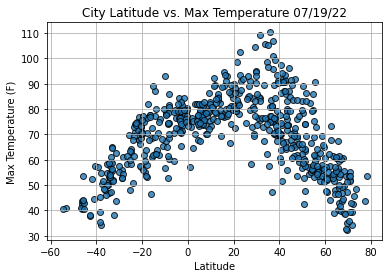

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

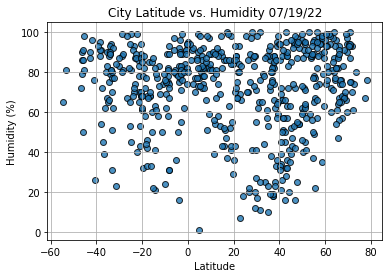

In [23]:
# Build the scatter plot for latitude vs. max humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

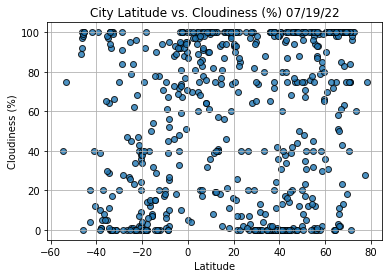

In [24]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

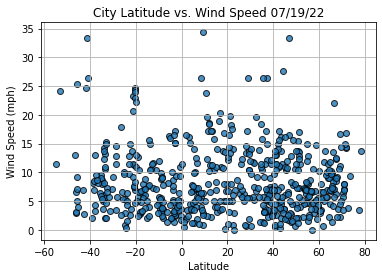

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()